 # Deteksi Abnormalitas Jantung Janin menggunakan Convolutional Neural Network
 
 
## Untuk memenuhi Project Akhir mata kuliah Jaringan Syaraf Tiruan

### Nama : Icha Dwi Marsella

### NIM :09011281924031

### Kelas : SK6A Reguler

# Import Modul

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from IPython.display import display
import ipywidgets as widgets

# Dataset Description

Dataset diakses dari data milik IsysRG

In [94]:
labels = ['ABNORMAL', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [31]:
train = get_training_data('C:/Users/ichaa/Documents/Fetal/Training')
test = get_training_data('C:/Users/ichaa/Documents/Fetal/Testing')

# Data Visualization & Preprocessing

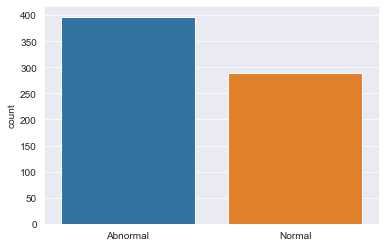

In [95]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Abnormal")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)     

Data tidak balance antara Jantung janin abnormal dan normal

# Previewing the images 

Text(0.5, 1.0, 'NORMAL')

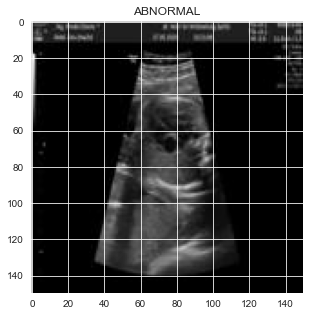

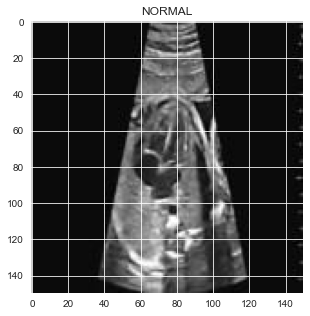

In [96]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [98]:
x_train = []
y_train = []


x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)


In [99]:
# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

In [100]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Data Augmentasi

In [101]:

datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range = 30,  
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True, 
        vertical_flip=False) 


datagen.fit(x_train)

# Training the Model

In [108]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_28 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_24 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_29 (Bat  (None, 75, 75, 64)      

In [109]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [110]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 ,callbacks = [learning_rate_reduction])

Epoch 1/12
22/22 [==============================] - 26s 1s/step - loss: 1.7176 - accuracy: 0.8163 - lr: 0.0010
Epoch 2/12
22/22 [==============================] - 23s 1s/step - loss: 0.2706 - accuracy: 0.9490 - lr: 0.0010
Epoch 3/12
22/22 [==============================] - 22s 1s/step - loss: 0.0453 - accuracy: 0.9854 - lr: 0.0010
Epoch 4/12
22/22 [==============================] - 23s 1s/step - loss: 0.0034 - accuracy: 1.0000 - lr: 0.0010
Epoch 5/12
22/22 [==============================] - 24s 1s/step - loss: 4.5174e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 6/12
22/22 [==============================] - 25s 1s/step - loss: 1.9191e-04 - accuracy: 1.0000 - lr: 0.0010
Epoch 7/12
22/22 [==============================] - 25s 1s/step - loss: 0.1207 - accuracy: 0.9592 - lr: 0.0010
Epoch 8/12
22/22 [==============================] - 24s 1s/step - loss: 0.0400 - accuracy: 0.9869 - lr: 0.0010
Epoch 9/12
22/22 [==============================] - 22s 999ms/step - loss: 0.0187 - accuracy: 0.9927 - l

In [111]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 1s 504ms/step - loss: 21.1660 - accuracy: 0.7500
Loss of the model is -  21.166004180908203
1/1 [==============================] - 0s 201ms/step - loss: 21.1660 - accuracy: 0.7500
Accuracy of the model is -  75.0 %


# Analysis after Model Training

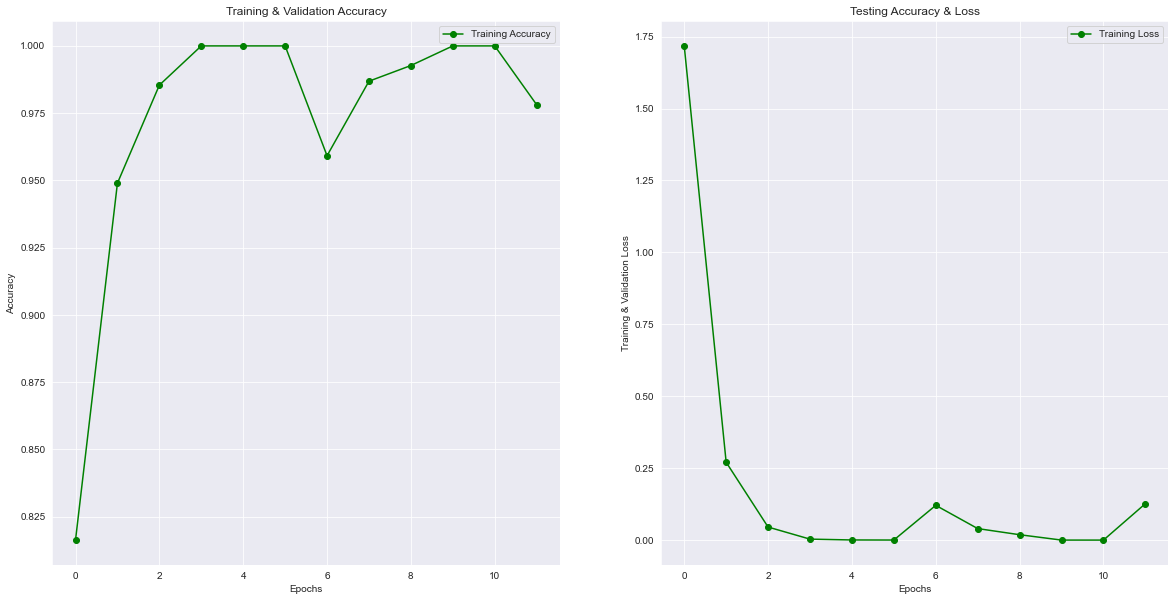

In [112]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Predictions and Testing

In [113]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
print(classification_report(y_test, predictions, target_names = ['Abnormal (Class 0)','Normal (Class 1)']))

                    precision    recall  f1-score   support

Abnormal (Class 0)       0.75      1.00      0.86        24
  Normal (Class 1)       0.00      0.00      0.00         8

          accuracy                           0.75        32
         macro avg       0.38      0.50      0.43        32
      weighted avg       0.56      0.75      0.64        32



In [115]:
cm = confusion_matrix(y_test,predictions)
cm

array([[24,  0],
       [ 8,  0]], dtype=int64)

In [116]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

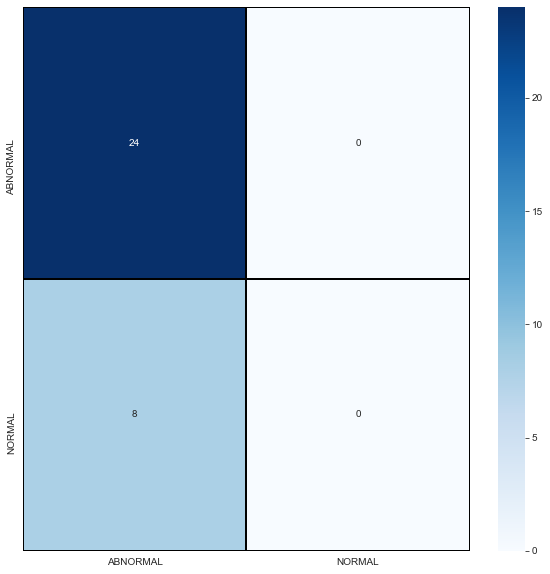

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [57]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

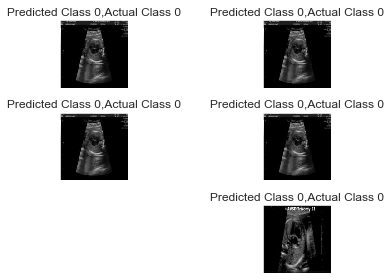

In [58]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

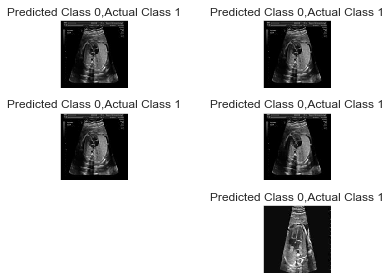

In [59]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [1]:
from IPython.display import display
import ipywidgets as widgets

In [2]:
from ipywidgets import FileUpload
from IPython.display import display
upload = FileUpload(accept='.txt', multiple=True)
display(upload)

FileUpload(value={}, accept='.txt', description='Upload', multiple=True)

In [3]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def clicked(_):
    with out:
        clear_output(wait=True)
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')

button.on_click(clicked)
widgets.VBox([button,out])